# **MOVIE RECOMMENDATION SYSTEM USING PYTHON**

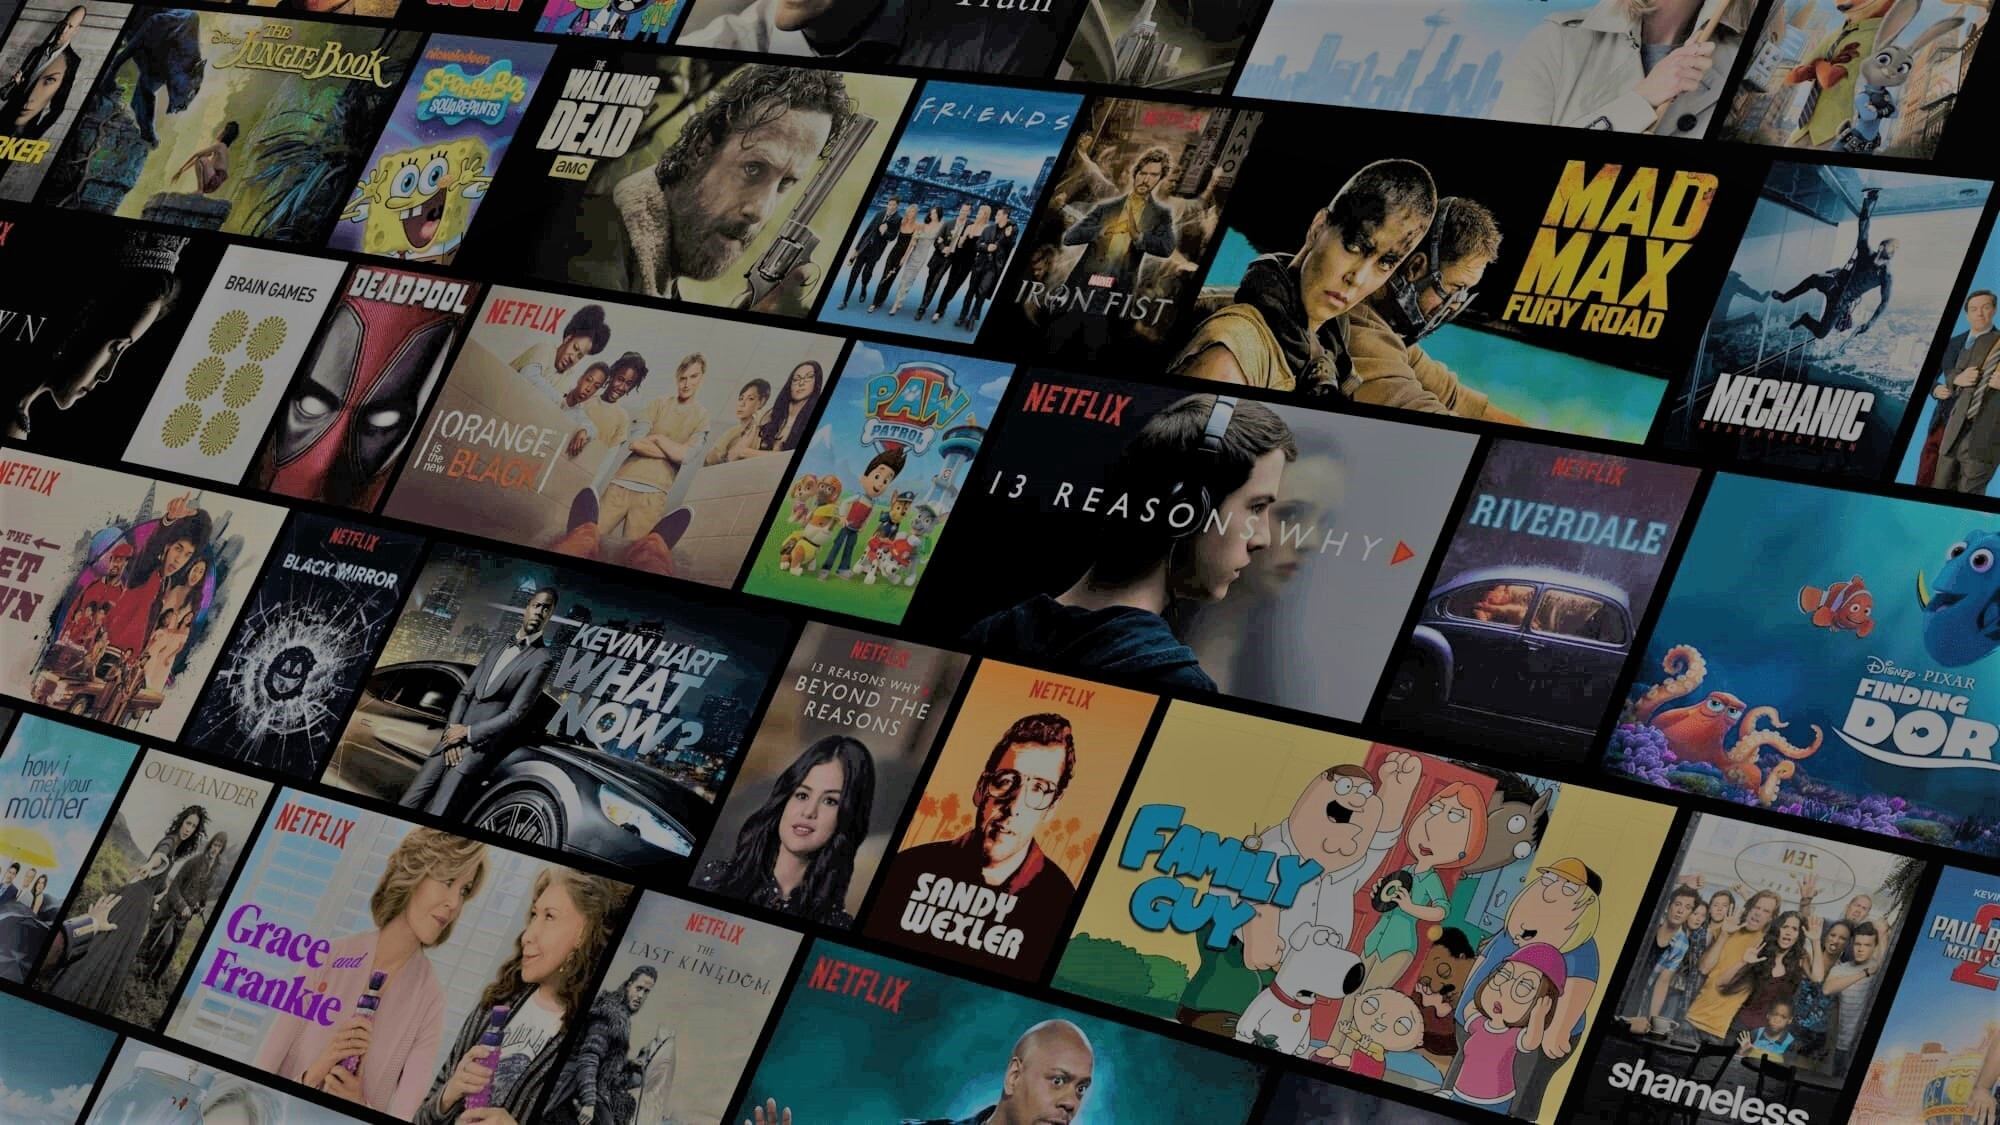

## **Introduction**

> Everyone, regardless of age, gender, race, color or geographic area, enjoys movies. Through this incredible medium, we are all connected in some manner. What's most intriguing, however, is how unique our movie likes and combinations are. Some people prefer genre films, such as thrillers, romances, or science fiction, while others are more interested in the leading stars and filmmakers. With all of this in mind, it's quite impossible to generalize a film and declare that everyone will enjoy it. Despite this, it is clear that similar films are enjoyed by a specific segment of the population. So this is where we, as data scientists, come in to extract the juice from all of the audience's and movie's behavioral patterns.







## **Recommendation System?**


> Simply described, a recommendation system is filtration program with the primary purpose of predicting user's "rating" or "desire" for a domain-specific item or item. Because the domain-specific object in our project is a movie, the major goal of our recommendation system is to filter and anticipate only those movie that a user prefer based on some information from the user.



## **Filtration Strategy**

> In this movie recommendation system project, we are using content-based filtering plus popularity-based filtering to build our machine learning model(recommendation system)



## **Importing Relevant Python Libraries**

In [ ]:
import pandas as pd # data manipulation/analysis
import numpy as np # multidimensional array computation
import seaborn as sns # adv data visualization
import matplotlib.pyplot as plt # data visualization
import difflib # compare sets of data
from sklearn.feature_extraction.text import TfidfVectorizer # transform text data into vector
from sklearn.metrics.pairwise import cosine_similarity # compute similarity
import tensorflow as tf

## **Data Collection** 

In [ ]:
# Read the dataset
df1 = pd.read_csv("movies.csv")

## **Data Pre-Processing**

In [ ]:
# Printing 5 first row of the dataframe
df1.head(3)

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes


In [ ]:
# Printing number of rows and columns in the dataframe
print(df1.shape)
print("---")
print("This dataframe contains 4803 rows and 24 columns")

(4803, 24)
---
This dataframe contains 4803 rows and 24 columns


In [ ]:
# Selecting relevant features for machine learning model
selected_features = ["genres", "keywords", "tagline", "cast", "director"]
print(selected_features)

['genres', 'keywords', 'tagline', 'cast', 'director']


In [ ]:
# Replacing null values with null string (handling missing values)
for feature in selected_features:
  df1[feature] = df1[feature].fillna("")

In [ ]:
# Combining all selected features
combined_features = df1["genres"]+" "+df1["keywords"]+" "+df1["tagline"]+" "+df1["cast"]+" "+df1["director"]

In [ ]:
print("the combined features are")
print(combined_features)

the combined features are
0       Action Adventure Fantasy Science Fiction cultu...
1       Adventure Fantasy Action ocean drug abuse exot...
2       Action Adventure Crime spy based on novel secr...
3       Action Crime Drama Thriller dc comics crime fi...
4       Action Adventure Science Fiction based on nove...
                              ...                        
4798    Action Crime Thriller united states\u2013mexic...
4799    Comedy Romance  A newlywed couple's honeymoon ...
4800    Comedy Drama Romance TV Movie date love at fir...
4801      A New Yorker in Shanghai Daniel Henney Eliza...
4802    Documentary obsession camcorder crush dream gi...
Length: 4803, dtype: object


In [ ]:
# Convert text data to vectors
vectorizer = TfidfVectorizer()
feature_vector = vectorizer.fit_transform(combined_features)

In [ ]:
print(feature_vector)

  (0, 2432)	0.17272411194153
  (0, 7755)	0.1128035714854756
  (0, 13024)	0.1942362060108871
  (0, 10229)	0.16058685400095302
  (0, 8756)	0.22709015857011816
  (0, 14608)	0.15150672398763912
  (0, 16668)	0.19843263965100372
  (0, 14064)	0.20596090415084142
  (0, 13319)	0.2177470539412484
  (0, 17290)	0.20197912553916567
  (0, 17007)	0.23643326319898797
  (0, 13349)	0.15021264094167086
  (0, 11503)	0.27211310056983656
  (0, 11192)	0.09049319826481456
  (0, 16998)	0.1282126322850579
  (0, 15261)	0.07095833561276566
  (0, 4945)	0.24025852494110758
  (0, 14271)	0.21392179219912877
  (0, 3225)	0.24960162956997736
  (0, 16587)	0.12549432354918996
  (0, 14378)	0.33962752210959823
  (0, 5836)	0.1646750903586285
  (0, 3065)	0.22208377802661425
  (0, 3678)	0.21392179219912877
  (0, 5437)	0.1036413987316636
  :	:
  (4801, 17266)	0.2886098184932947
  (4801, 4835)	0.24713765026963996
  (4801, 403)	0.17727585190343226
  (4801, 6935)	0.2886098184932947
  (4801, 11663)	0.21557500762727902
  (4801, 1672

## **Cosine Similarity**

In [ ]:
similarity = cosine_similarity(feature_vector)

In [ ]:
print(similarity)
print(similarity.shape)

[[1.         0.07219487 0.037733   ... 0.         0.         0.        ]
 [0.07219487 1.         0.03281499 ... 0.03575545 0.         0.        ]
 [0.037733   0.03281499 1.         ... 0.         0.05389661 0.        ]
 ...
 [0.         0.03575545 0.         ... 1.         0.         0.02651502]
 [0.         0.         0.05389661 ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.02651502 0.         1.        ]]
(4803, 4803)


In [ ]:
# getting the movie name from the user
movie_name = input("Enter your favourite movie name : ")

Enter your favourite movie name : Lord of The Rings


In [ ]:
# creating a list from the movies names given in the dataset
list_of_all_titles = df1["title"].tolist()
print(list_of_all_titles)

['Avatar', "Pirates of the Caribbean: At World's End", 'Spectre', 'The Dark Knight Rises', 'John Carter', 'Spider-Man 3', 'Tangled', 'Avengers: Age of Ultron', 'Harry Potter and the Half-Blood Prince', 'Batman v Superman: Dawn of Justice', 'Superman Returns', 'Quantum of Solace', "Pirates of the Caribbean: Dead Man's Chest", 'The Lone Ranger', 'Man of Steel', 'The Chronicles of Narnia: Prince Caspian', 'The Avengers', 'Pirates of the Caribbean: On Stranger Tides', 'Men in Black 3', 'The Hobbit: The Battle of the Five Armies', 'The Amazing Spider-Man', 'Robin Hood', 'The Hobbit: The Desolation of Smaug', 'The Golden Compass', 'King Kong', 'Titanic', 'Captain America: Civil War', 'Battleship', 'Jurassic World', 'Skyfall', 'Spider-Man 2', 'Iron Man 3', 'Alice in Wonderland', 'X-Men: The Last Stand', 'Monsters University', 'Transformers: Revenge of the Fallen', 'Transformers: Age of Extinction', 'Oz: The Great and Powerful', 'The Amazing Spider-Man 2', 'TRON: Legacy', 'Cars 2', 'Green Lant

In [ ]:
# getting the closest match movie name from user input
find_close_match = difflib.get_close_matches(movie_name, list_of_all_titles)
print(find_close_match)

['The Ruins', 'Wrath of the Titans', 'Land of the Lost']


In [ ]:
close_match = find_close_match[0]
print(close_match)

The Ruins


In [ ]:
index_of_the_movie = df1[df1.title == close_match]["index"].values[0]
print(index_of_the_movie)

1903


In [ ]:
# calculating similarity score
similarity_score = list(enumerate(similarity[index_of_the_movie]))
print(similarity_score)

[(0, 0.0), (1, 0.0), (2, 0.0), (3, 0.003340391428653121), (4, 0.0), (5, 0.0), (6, 0.0), (7, 0.019792193823289454), (8, 0.0), (9, 0.0), (10, 0.0), (11, 0.0), (12, 0.0), (13, 0.03313277218077069), (14, 0.0), (15, 0.018721184629677028), (16, 0.0), (17, 0.0), (18, 0.01973438687692957), (19, 0.0), (20, 0.0), (21, 0.0), (22, 0.0), (23, 0.0), (24, 0.002822335727135114), (25, 0.0030121063697869277), (26, 0.0), (27, 0.0), (28, 0.0), (29, 0.0), (30, 0.0), (31, 0.030491329651167624), (32, 0.03325179836569238), (33, 0.0), (34, 0.0), (35, 0.0), (36, 0.0), (37, 0.0), (38, 0.0), (39, 0.0184665208687669), (40, 0.0), (41, 0.0), (42, 0.0), (43, 0.0), (44, 0.0), (45, 0.012043461370941805), (46, 0.0), (47, 0.0), (48, 0.0), (49, 0.018912070924526833), (50, 0.0), (51, 0.0), (52, 0.0), (53, 0.0), (54, 0.0), (55, 0.0), (56, 0.0), (57, 0.0), (58, 0.04970776535514713), (59, 0.051405128119884486), (60, 0.003119776657069911), (61, 0.0), (62, 0.0), (63, 0.01812080520058539), (64, 0.0), (65, 0.0030505099882787855),

In [ ]:
len(similarity_score)

4803

In [ ]:
# sorting the movies based on their similarity score

sorted_similar_movies = sorted(similarity_score, key= lambda x:x[1], reverse = True )
print(sorted_similar_movies)

[(1903, 1.0000000000000002), (3768, 0.16220436948007697), (2882, 0.12702980685847362), (1933, 0.1109724443930582), (3331, 0.1077820821212834), (2293, 0.10732022045399928), (3614, 0.10307585621362339), (2353, 0.10018387961325989), (547, 0.09522556415455005), (3436, 0.09484255735947779), (2163, 0.09395100020252778), (4437, 0.09142161440756269), (3706, 0.09140820099335624), (964, 0.09135269418168508), (2178, 0.08612065809592546), (3038, 0.08217600223381386), (4327, 0.08046092181176302), (2088, 0.07873753614388389), (1844, 0.07802710820704488), (4418, 0.0771019524639474), (915, 0.07654588420486368), (1870, 0.07646772265745884), (3988, 0.07613246992245842), (1587, 0.07556380023813011), (3575, 0.07498731300505868), (4340, 0.07340047161476121), (3201, 0.06975760829723372), (4328, 0.06797128090183144), (4473, 0.06756052515866395), (1500, 0.06724118768088447), (1422, 0.06592749893083359), (4773, 0.06587391464613092), (3894, 0.06500946412400636), (3785, 0.06424702122642677), (4676, 0.06372689393

In [ ]:
# printing the name of similar movies based on the index

print("Movies suggested for you : \n ")

i = 1
for movie in sorted_similar_movies:
  index = movie[0]
  title_from_index = df1[df1.index==index]["title"].values[0]
  if (i<30):
    print(i," ", title_from_index)
    i+=1

Movies suggested for you : 
 
1   The Ruins
2   The Real Cancun
3   The Dangerous Lives of Altar Boys
4   Underclassman
5   The Neon Demon
6   The Crazies
7   Saved!
8   Life as a House
9   Sucker Punch
10   The Messenger
11   The Covenant
12   The Quiet
13   Donnie Darko
14   For Love of the Game
15   Into the Wild
16   Hey Arnold! The Movie
17   The Dead Undead
18   Pulse
19   The Grey
20   Steppin: The Movie
21   Stepmom
22   She's the Man
23   Diary of the Dead
24   The Curse of the Were-Rabbit
25   Clerks II
26   Chernobyl Diaries
27   Veronika Decides to Die
28   The Vatican Exorcisms
29   The Innkeepers


## **All code combined in one code cell for the recommendation system**

In [ ]:
#Full code for the recommendation system
movie_name = input("Enter your favorite movie name : ")

list_of_all_titles = df1["title"].tolist()

find_close_match = difflib.get_close_matches(movie_name, list_of_all_titles)

close_match = find_close_match[0]

index_of_the_movie = df1[df1.title==close_match]["index"].values[0]

similarity_score = list(enumerate(similarity[index_of_the_movie]))

sorted_similar_movies = sorted(similarity_score, key=lambda x:x[1], reverse=True)

print("Movies suggested for you : \n ")

i = 1
for movie in sorted_similar_movies:
  index = movie[0]
  title_from_index = df1[df1.index==index]["title"].values[0]
  if (i<30):
    print(i, ".", title_from_index)
    i+1

Enter your favorite movie name : The Lord of The Rings
Movies suggested for you : 
 
1 . The Lord of the Rings: The Two Towers
1 . The Lord of the Rings: The Return of the King
1 . The Lord of the Rings: The Fellowship of the Ring
1 . The Hobbit: The Battle of the Five Armies
1 . The Hobbit: An Unexpected Journey
1 . The Hobbit: The Desolation of Smaug
1 . Warcraft
1 . The Shadow
1 . G.I. Jane
1 . Pirates of the Caribbean: Dead Man's Chest
1 . The Da Vinci Code
1 . Armageddon
1 . The Incredible Hulk
1 . A Dangerous Method
1 . The Three Musketeers
1 . Vampires
1 . X-Men
1 . Daylight
1 . X-Men: The Last Stand
1 . Deep Impact
1 . The Last Witch Hunter
1 . Ladyhawke
1 . Ella Enchanted
1 . Pirates of the Caribbean: At World's End
1 . Why Did I Get Married Too?
1 . Elizabethtown
1 . Jumper
1 . Pirates of the Caribbean: The Curse of the Black Pearl
1 . Prison
1 . X2
1 . Madea's Family Reunion
1 . The Adventurer: The Curse of the Midas Box
1 . The Road
1 . Super
1 . Robot & Frank
1 . Carrie
1 